#  This Jupyter Notebook contains the codes of various Euler Bernoulli Beam simulations From Sauer First Edition


## Constants definitions

In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

## Both ends fixed

In [2]:
n = 1000; % number of subintervals on [0, L]
h = L/(n + 1); % discretization spacing

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(n, 1);

% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, n);
dp1 = dm1 = -4*ones(1, n-1);
dp2 = dm2 = ones(1, n-2);
% Fixed left end
d0(1) = 12.0; %d0(2) = 6.0;
dp1(1) = -6.0;
dp2(1) = (4/3);
%dm1(1) = -4.0;
%dm2(1) = 1.0;

d0(n) = -12.0; %d0(n-1) = 6.0;
%dp1(n-1) = -4.0;
%dp2(n-2) = 1.0;
dm1(n-1) = -6.0;
dm2(n-2) = (4/3);
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots
x = (h:h:L-h)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =   1.3682e-004


In [ ]:
y
y_exact

## Left Fixed, Right Free

In [4]:
n = 1000; % number of subintervals on [0, L]
h = L/(n + 1); % discretization spacing
%N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(n, 1);
%f(1) = f(N) = 0;


% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, n);
dp1 = dm1 = -4*ones(1, n-1);
dp2 = dm2 = ones(1, n-2);
% Fixed left end
d0(1) = 12.0; d0(2) = 6.0;
dp1(1) = -6.0;
dp2(1) = (4/3);
dm1(1) = -4.0;
dm2(1) = 1.0;

% Free right end
d0(n) = (12/25); 
d0(n-1) = (111/25);
dp1(n-1) = -(43/25);
dp2(n-2) = 1.0;
dm1(n-1) = -(24/25);
dm1(n-2) = -(93/25);
dm2(n-2) = (12/25);
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (h:h:L - h)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =   3.3215e-006


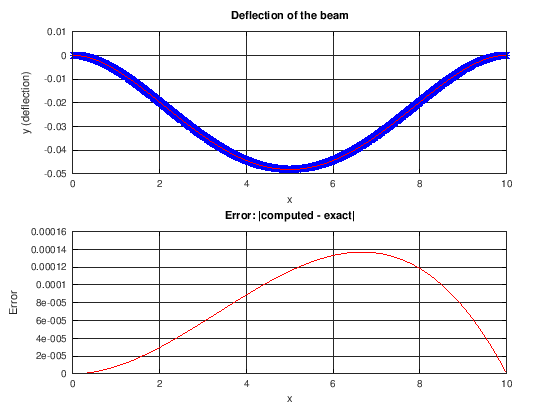

In [3]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

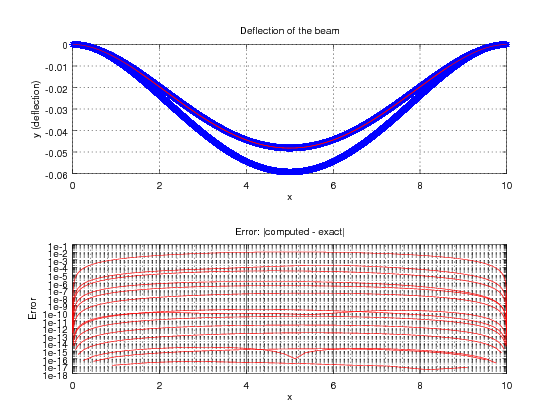

In [6]:

% vector that contains error values
ErrorsBothFixed = [];
n = 10; % number of subintervals on [h, L - h]
for i=1:14 
    h = L/(n + 1); % discretization spacing

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(n, 1);

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, n);
    dp1 = dm1 = -4*ones(1, n-1);
    dp2 = dm2 = ones(1, n-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Fixed right end
    d0(n) = 12.0; d0(n-1) = 6.0;
    dp1(n-1) = -4.0;
    dp2(n-2) = 1.0;
    dm1(n-1) = -6.0;
    dm2(n-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots
    x = (h:h:L-h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrorsBothFixed(i) = max(abs(y-y_exact));
    n = n * 2;
    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    semilogy(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor

ErrorsBothFixed = ErrorsBothFixed';

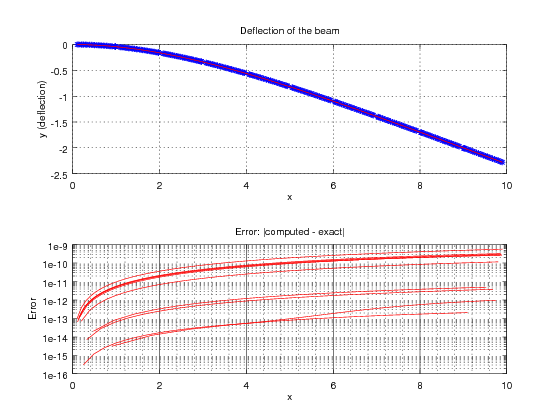

In [15]:

% vector that contains error values
ErrorsLeftFixedRightFree = [];
n = 10; % number of subintervals on [0, L]

    
    
for i=1:100 
    %N = n + 1; % number of unknowns to be solved for
    h = L/(n+1); % discretization spacing

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(n, 1);
    %f(1) = f(N) = 0;


    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, n);
    dp1 = dm1 = -4*ones(1, n-1);
    dp2 = dm2 = ones(1, n-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Free right end
    d0(n) = (12/25); 
    d0(n-1) = (111/25);
    dp1(n-1) = -(43/25);
    dp2(n-2) = 1.0;
    dm1(n-1) = -(24/25);
    dm1(n-2) = (-93/25);
    dm2(n-2) = (12/25);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots

    x = (h:h:L - h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
    ErrorsLeftFixedRightFree(i) = max(abs(y-y_exact));
    n = n + 10;

    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    semilogy(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor
ErrorsLeftFixedRightFree = ErrorsLeftFixedRightFree';

In [ ]:

% vector that contains error values
ErrorsBothFixed = [];
n = 10; % number of subintervals on [0, L]
for i=1:100 
    h = L/n; % discretization spacing
    N = n + 1; % number of unknowns to be solved for

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    f(1) = f(n) = 0;

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, N);
    dp1 = dm1 = -4*ones(1, N-1);
    dp2 = dm2 = ones(1, N-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Fixed right end
    d0(N) = 12.0; d0(N-1) = 6.0;
    dp1(N-1) = -4.0;
    dp2(N-2) = 1.0;
    dm1(N-1) = -6.0;
    dm2(N-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    
    % Plots

    x = (0:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrorsBothFixed(i) = max(abs(y-y_exact));
    n = n + 10;
    N = n + 1;
    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    semilogy(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor

ErrorsBothFixed = ErrorsBothFixed';

In [ ]:
ErrorsLeftFixedRightFree

In [3]:
ErrorsBothFixed

ErrorsBothFixed =

   4.5103e-17
   1.9568e-15
   3.1017e-15
   2.5144e-13
   2.6079e-12
   3.5255e-11
   2.9305e-10
   2.1994e-10
   4.1388e-08
   4.0065e-07
   1.4277e-06
   3.5426e-05
   1.8594e-04
   1.1107e-02



# Reconstructing matrix A for Backslash Solver

## Both ends fixed

In [2]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
format short
A = [];

n = 10; % number of subintervals on [h, L]
h = L/(n+1); % discretization spacing
N = n; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
%f(1) = f(N) = 0;


% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 1
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 1
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 1
            A(i,j) = 1;
        endif
    endfor
endfor


% left end point
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);

% right endpoint
A(N,N) = -12;
A(N-1,N) = -4;
A(N,N-1) = -6;
A(N-1,N-1) = 6;
A(N,N-2) = (4/3);

min(abs(eig(A)))
cond(A)

ans =  0.043215
ans =  382.45


ErrMax =  0.012913
x =

 Columns 1 through 6:

     0.00000     0.90909     1.81818     2.72727     3.63636     4.54545

 Columns 7 through 12:

     5.45455     6.36364     7.27273     8.18182     9.09091    10.00000

error: horizontal dimensions mismatch (1x1 vs 10x1)
error: evaluating argument list element number 2
error: horizontal dimensions mismatch (10x1 vs 1x1)
error: evaluating argument list element number 2


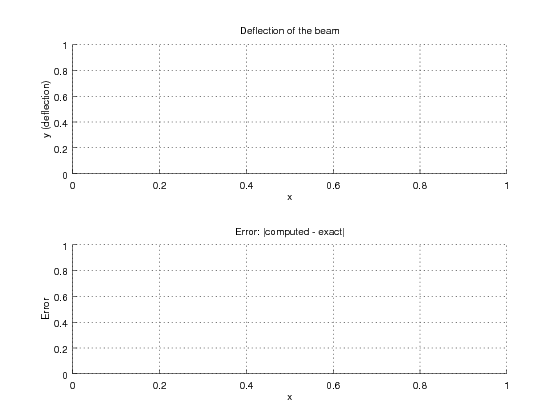

In [3]:
% Compressing the matrix into a sparse matrix
A = sparse(A);

% Finding y
y = A\f;

% Plots
x = (h:h:L - h)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

x = (0:h:L);
subplot(2,1,1);
plot(x, [ 0 y 0 ], "b*", x, [0 y_exact 0 ], "r")
hold on
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
semilogy(x, [abs(y - y_exact) 0], "r")
hold on
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Left end fixed right end free

In [11]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
format long


n = 10; % number of subintervals on [h, L]
A = sparse(n,n);
h = L/(n+1); % discretization spacing
N = n+1; % number of unknowns to be solved for 

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
%f(1) = f(N) = 0;

% left end point
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);

% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 1
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 1
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 1
            A(i,j) = 1;
        endif
    endfor
endfor

% right endpoint
A(N,N) = (12/25);
A(N-1,N) = (-43/25);
A(N,N-1) = (-24/25);
A(N-1,N-1) = (111/25);
A(N,N-2) = (12/25);
A(N-1,N-2) = (-93/25);

min(abs(eig(A)))
cond(A)


ans =    6.02745794507320e-04
ans =  28088.6945738629


ErrMax =  0.598247851239307


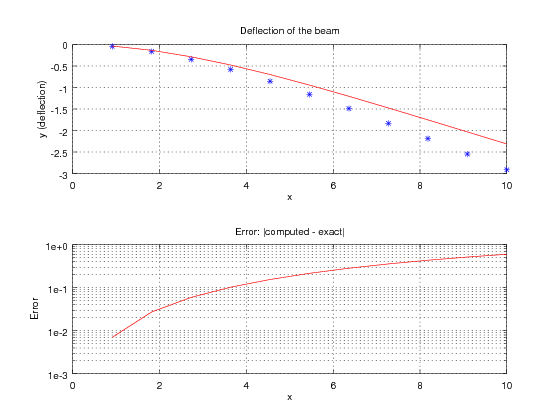

In [12]:
% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
hold on
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
semilogy(x, abs(y - y_exact), "r")
hold on
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

# Computing First Derivatives


### First derivative of both ends fixed on left end

In [5]:
n = 10; % number of subintervals on [0, L]

for i=1:10
    h = L/(n + 1); % discretization spacing

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(n, 1);

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, n);
    dp1 = dm1 = -4*ones(1, n-1);
    dp2 = dm2 = ones(1, n-2);
    % Fixed left end
    d0(1) = 12.0; %d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    %dm1(1) = -4.0;
    %dm2(1) = 1.0;

    % Fixed right end; flipped sign
    d0(n) = 12.0; %d0(n-1) = 6.0;
    %dp1(n-1) = -4.0;
    %dp2(n-2) = 1.0;
    dm1(n-1) = -6.0;
    dm2(n-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots
    x = (h:h:L-h)';
    
    (y(2) - y(1))/h
    n = n * 2;
endfor

ans = -0.012960
ans = -0.0086812
ans = -0.0050102
ans = -0.0026900
ans = -0.0013936
ans =   -7.0928e-04
ans =   -3.5779e-04
ans =   -1.7969e-04
ans =   -9.0045e-05
ans =   -4.5073e-05
